## Outline
- Max-flow min-cut theorem (intervention and applications)
- Network flow optimization
- Implementation of Ford-Fulkerson

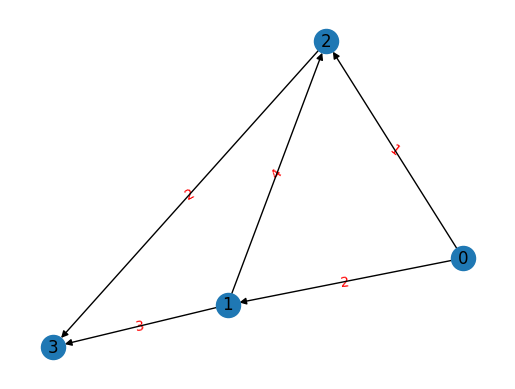

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(2,3),(1,3)])

pos = nx.spring_layout(G)

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'2',
(0,2):'1',(1,2):'4',(1,3):'3',
(2,3):'2'},font_color='red')

nx.draw(G, pos, with_labels = True)

## Intervention in capacitated networks: two dual problems

### Adversarial intervention
**Question**: suppose you are an adversarial agent that aims at minimizing the throughput that can be sent from 0 to 3 by removing capacity subject to a budget constraint. 
- Where do you remove the capacity? 
- What is the minimal capacity that you need to remove in order to disconnect the network?

**Answer** 
- Since the bottleneck of the flow is the min-cut of the network, the adversary should reduce the capacity of such a cut. The cut capacities in this example are:

    - $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 5$
    - $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 8$
    - $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
    - $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 3$


- in this case, the adversary should reduce capacity of edges between the sets $\{0\}$ and the set $\{1,2,3\}$, which are $(0,1)$ and $(0,2)$. The minimal capacity that needs to be removed equals the capacity of the min-cut of the network, which is 3.

### Planner intervention
**Question**: Suppose you are a planner that aims at maximing the flow that can be send from 0 to 3. Where do you allocate the capacity?

**Answer**: you should allocate the capacity in such a way that the capacity of the min-cut is maximized.

### Example 1

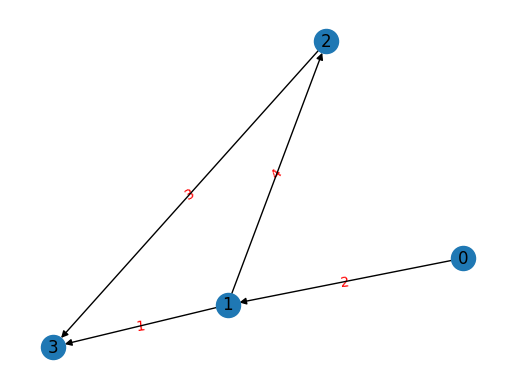

In [2]:
G.remove_edge(0,2)

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'2',(1,2):'4',(1,3):'1',
(2,3):'3'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Problem**: suppose you can allocate a capacity 4 (that can be distributed on several links). Where do you allocate it?

**Solution**: first compute the capacity of the cuts:
- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 2$

The min-cut is $\{0\},\{1,2,3\}$, thus some capacity should be allocated on the links between these set, i.e., on $(0,1)$.

Is allocating capacity 4 on $(0,1)$ optimal? NO!

In such a case, the cut capacities become:

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 6$

and the corresponding throughput is 4.

You should first allocate capacity 2 on edge $(0,1)$, until there are two min-cuts. The cut capacities then become

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 4$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 4$,

with still a capacity 2 to be allocated. This remaining capacity should be allocated on both the first and the last cut, so the final solution is to allocate capacity 3 on the edge $(0,1)$, and 1 on either $(1,3)$ or $(2,3)$, which leads to cuts

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 5$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U \ge 5$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U \ge 5$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 5$,

and maximal throughput 5.

### Example 2
In some cases, it is possible that the capacity of two min-cuts is increased by improving only one edge.
Consider the following example:

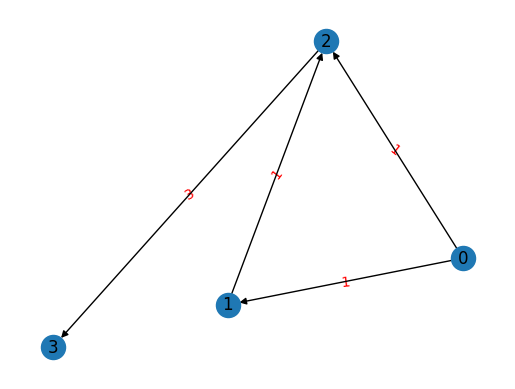

In [3]:
G.add_edge(0,2)
G.remove_edge(1,3)

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'1',(0,2):'1',(1,2):'1',
(2,3):'3'},font_color='red')

nx.draw(G, pos, with_labels = True)

**Question 1**: what is the maximal throughput that can be send from 0 to 3?

**Answer**: we start by computing the cut capacities:

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 3$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 2$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 2$.

The maximal throughput is thus 2.

**Question 2**: suppose you can allocate a capacity 1 on the network. Where do you allocate it?

**Answer**: there are two mincuts. 
- For the mincut $U=\{0,1\},U^C=\{2,3\}$,
$$
C_U = c(0,2) + c(1,2)
$$ 
- For the mincut $U=\{0\},U^C=\{1,2,3\}$,
$$
C_U = c(0,1) + c(0,2)
$$

Note that both the capacities can be improved by adding capacity 1 to the edge $(0,2)$. By doing this, the capacities become

- $U=\{0,1,2\},U^C=\{3\}$ -> $C_U = 3$
- $U=\{0,1\},U^C=\{2,3\}$ -> $C_U = 3$
- $U=\{0,2\},U^C=\{1,3\}$ -> $C_U = 4$
- $U=\{0\},U^C=\{1,2,3\}$ -> $C_U = 3$,

and the maximal throughput becomes 3.

Obviously, these type of considerations can be implemented algorithmically.

## Multi origin-destination maxflow

So far, we have studied maximum flow problems when there is a single origin-destination pair. 

For some applications, it is useful to find maximum flow with multiple origin-destinations.

The multi o-d maxflow problem may be rephrased in terms of single o-d maxflow problem, and then handled with the instruments introduced above. Let us see this by an example.

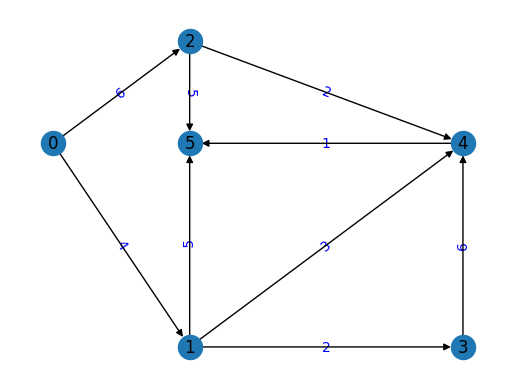

In [4]:
G = nx.DiGraph()
G.add_edges_from([(0,2),(0,1),(2,4),(1,3),(2,5),(3,4),(4,5),(1,4),(1,5)])

pos = {0: [0,2], 1: [1,0], 2: [1,3], 3: [3,0], 4: [3,2], 5:[1,2] }

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'4',
(0,2):'6',(2,4):'2',(2,5):'5',
(3,4):'6', (4,5):'1', (1,3):'2', (1,4):'3', (1,5): ' 5'},font_color='blue')

nx.draw(G, pos, with_labels = True)

Consider sources $\{0,1\}$ and sinks $\{4,5\}$. To reconduct the problem to a single source and sink, an equivalent problem is to add an additional pair of nodes 'S' and 'T', and add edges from $S$ to every source of the original network, and from every sink of the original network to $T$, with infinite capacity.

For simplicity, let us call 6 and 7 the new nodes.

We define the resulting network for this example.

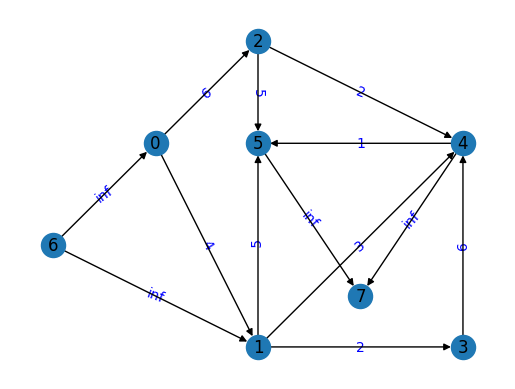

In [5]:
G1 = nx.DiGraph()
G1.add_edges_from([(0,2),(0,1),(2,4),(1,3),(2,5),(3,4),(4,5),(1,4),(1,5)])

# add additional nodes and edges
G1.add_edges_from([(6,0),(6,1),(4,7),(5,7)])

# define position for the two new nodes
pos = {0: [0,2], 1: [1,0], 2: [1,3], 3: [3,0], 4: [3,2], 5:[1,2], 6:[-1,1], 7:[2,0.5]}

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'4',
(0,2):'6',(2,4):'2',(2,5):'5',
(3,4):'6', (4,5):'1', (1,3):'2', (1,4):'3', (1,5): ' 5',
(6,0):'inf',(6,1):'inf',(4,7):'inf',(5,7):'inf'},font_color='blue')

nx.draw(G1, pos, with_labels = True)

**Proposition**: the max-flow in the new network with source S and sink T is equivalent to the max-flow of the original problem.

In [6]:
# We define the capacities, and use NetworkX algorithms to compute maximum flow

G1[0][2]['capacity'] = 6
G1[0][1]['capacity'] = 4
G1[2][4]['capacity'] = 4
G1[2][5]['capacity'] = 5
G1[3][4]['capacity'] = 6
G1[4][5]['capacity'] = 1
G1[1][3]['capacity'] = 2
G1[1][4]['capacity'] = 3
G1[1][5]['capacity'] = 5

# call S = 6, and T = 7, and assign infinite capacity
G1[6][0]['capacity'] = float('inf')
G1[6][1]['capacity'] = float('inf')
G1[4][7]['capacity'] = float('inf')
G1[5][7]['capacity'] = float('inf')

nx.algorithms.flow.maximum_flow(G1,6,7)

(16,
 {0: {2: 6, 1: 4},
  2: {4: 4, 5: 2},
  1: {3: 2, 4: 3, 5: 5},
  4: {5: 0, 7: 9},
  3: {4: 2},
  5: {7: 7},
  6: {0: 10, 1: 6},
  7: {}})

In [7]:
# compute also the minimum cut
nx.algorithms.flow.minimum_cut(G1,6,7)

(16, ({0, 1, 6}, {2, 3, 4, 5, 7}))

As expected, the minimum cut equals the maximal flow.

## Application of multi o-d maxflow problems: perfect matching

**Definition**: given a graph $G=(V,E)$, a matching is a subset of edges $M \subseteq E$ such that no two edges in $M$ share a common node (head or tail).

**Definition**: Consider a simple bipartite graph, whereby the node set can be partitioned as $V = V_0 \cup V_1$, with $V_0 \cap V_1 = \emptyset$, and no edges between nodes of the same set exist. For $h = 0,1$, we shall refer to a matching $M$ in $G$ as $V_h$-perfect (or $V_h$-saturating) if every node in $V_h$ is matched in $M$.

### Example

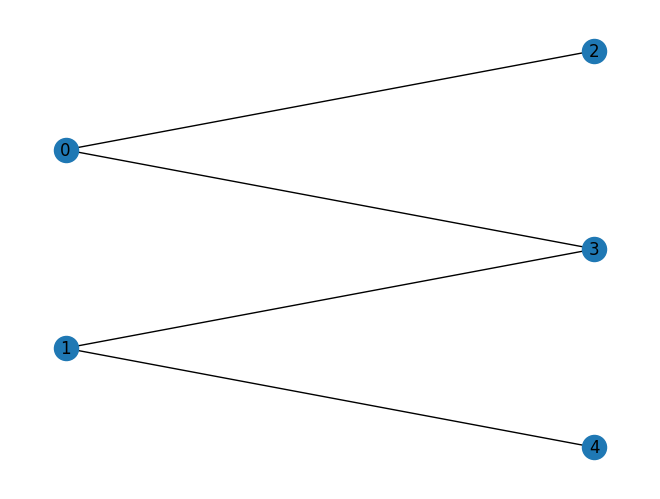

In [8]:
G = nx.Graph()
G.add_edges_from([(0,2),(0,3),(1,3),(1,4)])

pos = {0:[0,2], 1:[0,0], 2:[2,3], 3:[2,1], 4:[2,-1]}

nx.draw(G, pos, with_labels=True)

We immediately observe that the graph is bipartite, with $V_0 = \{0,1\}, V_1 = \{2,3,4\}$.

We now provide a $V_0$-perfect matching, i.e., a matching that matches every node in $V_0$

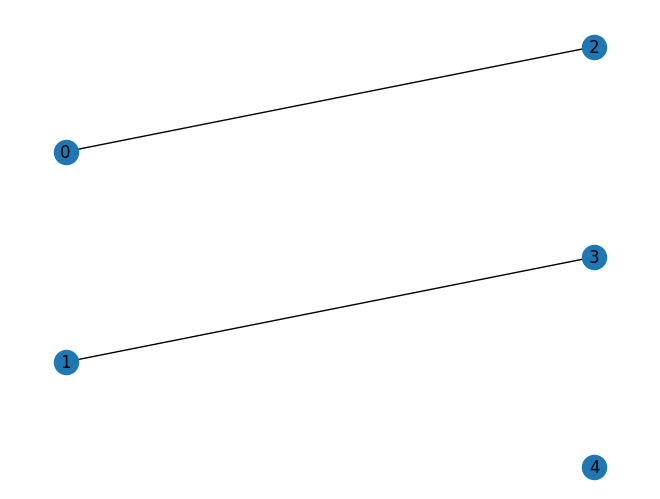

In [9]:
G = nx.Graph()
G.add_edges_from([(0,2),(1,3)])
G.add_node(4)

pos = {0:[0,2], 1:[0,0], 2:[2,3], 3:[2,1], 4:[2,-1]}

nx.draw(G, pos, with_labels=True)

**Question**: can you find a $V_1$ perfect matching?

**Hall's marriage Theorem**: for a simple bipartite graph $G = (V,E)$ and $V_0 \subseteq V$, there exists a $V_0$-perfect matching in $G$ if and only if

$$
|\mathcal{U}| \le |\mathcal{N}_{\mathcal{U}}| \quad \forall \mathcal{U} \subseteq V_0,
$$

where
$$
\mathcal{N}_{\mathcal{U}} = \sum_{i \in \mathcal{U}} \mathcal{N}_i
$$
is the neighborhood of $\mathcal{U}$ in $G$.

In other words, for every subset $U$ of $V_0$, we require that $U$ possesses a number of neighboring nodes which is at least the number of nodes in $U$. The necessity of such condition is trivial to verify, for the sufficiency we refer to the lecture notes.

We here focus on the algorithmic viewpoint of matching problems and on applications.

**Application, example**: assume there are 5 people and 5 books (with one copy of each book), and each person expresses interest in some of the books. Is there a way to assign to every person a book of interest?

We can represent this situation by a simple bipartite network, where $V_0$ is the set of people and $V_1$ and the set of books, and an edge $(n_0,n_1)$ (with $n_0 \in V_0$, $n_1 \in V_1$) exists if the person $n_0$ is interested in the book $n_1$. 

The question may be rephrased in: "does a $V_0$-perfect matching exist?" 

If there are less books than people, i.e., if $|V_1|<|V_0|$, a $V_0$-perfect matching cannot exist. This follows immediately from Hall's theorem by taking $\mathcal{U}=V_0$, and observing that $N_{\mathcal{U}} \subseteq V_1$.

**Remark**: Note that a perfect matching (both for $V_0$ and $V_1$) can exist only if $|V_0|=|V_1|$.

We consider a simple bipartite network, and try a naive algorithm to answer the question.

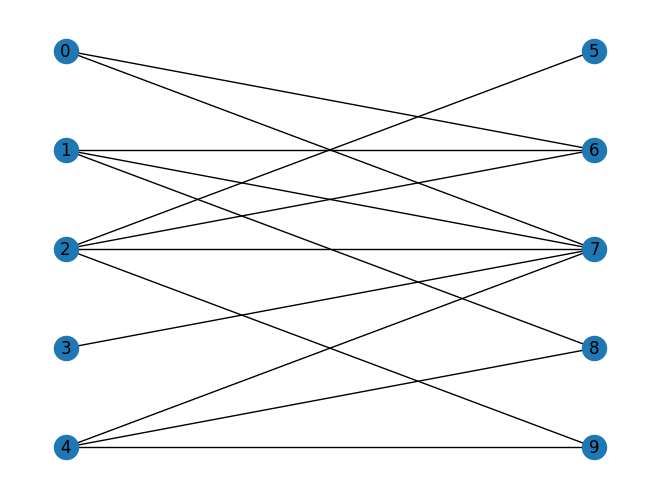

In [10]:
G = nx.Graph()
G.add_edges_from([(0,6),(0,7),(1,6),(1,7),(1,8),(2,5),(2,6),(2,7),(2,9),(3,7),(4,7),(4,8),(4,9)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[0,-2], 5:[1,2], 6:[1,1], 7:[1,0], 8:[1,-1], 9:[1,-2]}

nx.draw(G,pos, with_labels=True)

We let the left nodes to be people, and the right nodes to be books. You can verify that the graph is bipartite.

We try this greedy algorithm: for every person (from above to below) we assign the first book (from above to below) of interest.

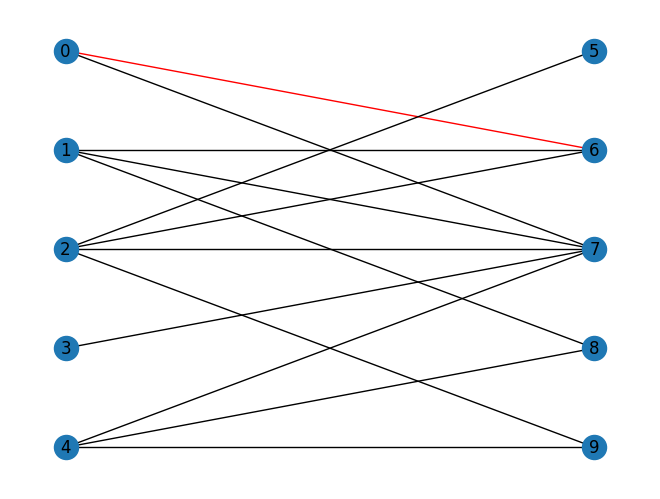

In [11]:
# Assign book 6 to person 0
for u,v in G.edges():
    G[u][v]['color'] = 'black'
    
G[0][6]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

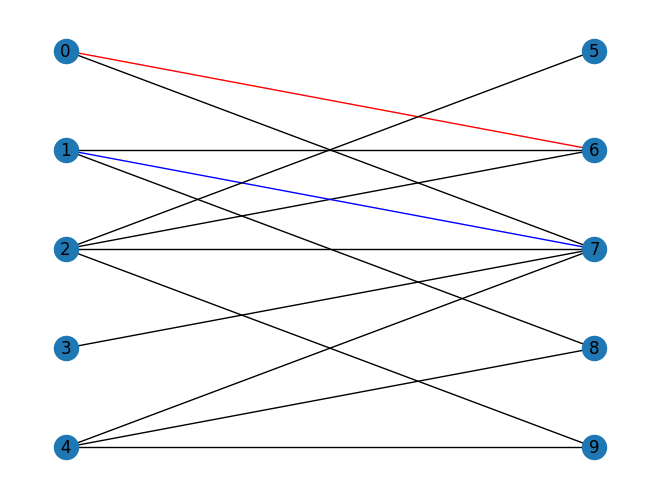

In [12]:
# Book 6 is not available for person 1, thus assign book 7
G[1][7]['color'] = 'blue'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

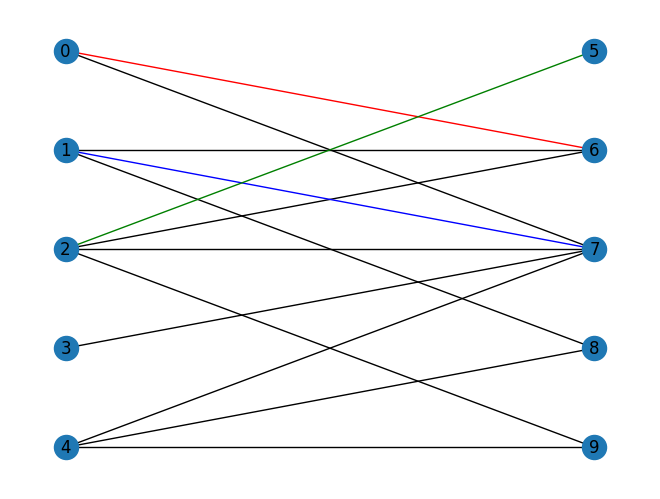

In [13]:
# Assign book 5 to person 2
G[2][5]['color'] = 'green'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

Node 3 is not matched! The greedy algorithm fails in finding a perfect matching. 

However, this does not mean that a perfect matching does not exist. To verify that a perfect matching exists, one could verify the sufficient and necessary condition in Hall's marriage theorem. 

We instead show an analogy between maximal flows and perfect matching, and exploit such an analogy to find perfect matching by Ford-Fulkerson theorem.

Given a simple bipartite graph $G=(V,E)$, consider the directed capacitated graph $G1$, with node set $V \cup s \cup t$, and edge set constructed as follows:
- for every node $n \in V_0$, add an edge (s,n), with capacity 1;
- for every node $n \in V_1$, add an edge (n,t), with capacity 1;
- for every undirected edge $(i,j)$ in $G$, add a directed edge $(i,j)$ in $G1$ with capacity 1.

Let us construct $G1$.

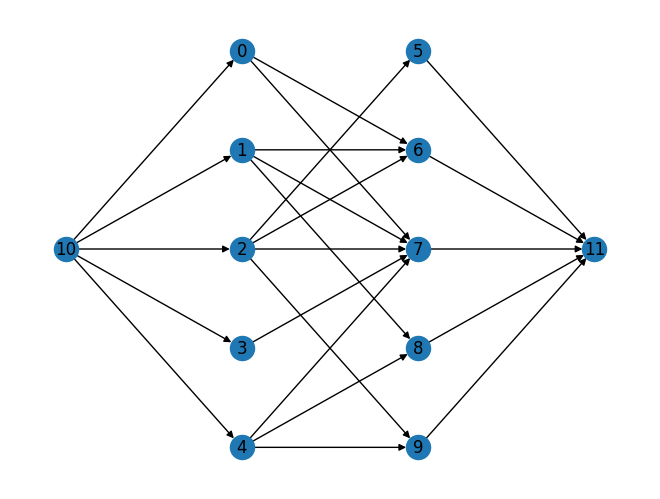

In [14]:
G1 = nx.DiGraph()
G1.add_edges_from([(0,6),(0,7),(1,6),(1,7),(1,8),(2,5),(2,6),(2,7),(2,9),(3,7),(4,7),(4,8),(4,9)])
G1.add_edges_from([(10,0),(10,1),(10,2),(10,3),(10,4),(5,11),(6,11),(7,11),(8,11),(9,11)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[0,-2], 5:[1,2], 6:[1,1], 7:[1,0], 8:[1,-1], 9:[1,-2], 10:[-1,0], 11:[2,0]}

nx.draw(G1,pos,with_labels=True)

There is an analogy between perfect matchings and maximal flow on this auxiliary network $G1$. In particular, a $V_0$-perfect matching on $G$ exists if and only if it there exists a flow with throughput $|V_0|$ on the network $G1$. We can now exploit Ford-Fulkerson algorithm to find the maximum flow that can be sent in $G1$.

**Remark**: the analogy can be proved by using the fact that, if the capacities of the edges are integers, then the maximum flow has integer components (see the lecture notes). Because of the network structure, if a maximum flow with throughput $|V_0|$ exists, then every node in $V_0$ has incoming and outcoming flow $1$, since all the edges have unitary capacity. Moreover, given a node $i \in |V_0|$, if a $|V_0|$-perfect matching exists, then there exists $k \in V_1$ such that

$$
f_{(i,j)} = 
\begin{cases}
1 \quad \text{if} \ j = k \\
0 \quad \text{otherwise}
\end{cases}
$$

Thus, given a maximum flow with throughput $|V_0|$, the associated $V_0$-perfect matching can be found by selecting all the edges $(i,j)$ ($i \in V_0, j \in V_1$) such that $f_{(i,j)}=1$.

**Exercise**: find the maximum flow on $G1$, and deduce the perfect matching on $G$.

The analogy can be pushed further by finding perfect matching in weighted graphs. With respect to our example, this would mean to allow multiple copies of the books, and to allow people to take more than one book.

In the last part of the lecture, we focus on network flow optimization.

# Network Flow optimization
For this exercise, we will use CVXPY which is a Python-embedded modeling language for convex optimization problems. It allows to express problems in a natural way that follows the math, rather than in the restrictive standard form required by solvers (Matlab has the equivalent CVX).

If CVXPY is not already in your environment, you can install it following the instructions reported [here](https://www.cvxpy.org/install/index.html). (for Anaconda in Windows run in your notebook the command **conda install -c conda-forge cvxpy**)

Separable convex network flow optimization arises in several applications, e.g., shortest paths between origin and destination, system optimum network flows, user optimum network flows in homogeneous routing games, electrical current flows in resistor networks.

Given a multigraph $(V,E)$, an **exogenous network flow** is a vector ${\nu} \in \mathrm{R}^V$ such that

\begin{equation}
	\sum_{i \in V} \nu_i = 0.
\end{equation}

A network flow is a vector $f \in \mathrm{R}^E$ satisfying a positivity constraint and a mass conservation constraints, i.e.,

\begin{equation}
 f \ge \mathbf{0}, \quad Bf = \nu.
\end{equation}

Every edge is endowed with a separable non-decreasing convex cost function $\psi_e(f_e)$ such that $\psi_e(0)=0$. 

Given an exogenous flow $\nu$ and a network with node-edge matrix $B$, we study the following optimization problem:

\begin{equation}
\begin{aligned}
	f^* \in \ & \underset{\substack{f \in \mathrm{R}^{E}_+ \\ B f = \nu}}{\arg\min}
	& & \sum_{e \in E} \psi_e (f_e).
\end{aligned}
\end{equation}

The ratio $\psi_e(f_e) / f_e$ may be interpreted as the cost per unit of flow sent along the edge $e$. The convexity of $\psi_e(f_e)$ is thus equivalent to requiring that the marginal cost for sending some flow on each edge is non-decreasing in the flow itself.

This class of problems may be applied for shortest paths algorithms in a two-terminal network with origin and destination $(o,d)$. For instance:
- if $\psi_e(f_e) = f_e$, the cost for a unit of flow is 1, which means that all the edges have same length 1, and the cost paid for sending flow along an edge is simply proportional to the flow $f_e$ itself;
- if $\psi_e(f_e) = l_e f_e$, each edge is endowed with a length $l_e$ which differs from edge to edge. Even in this formulation, the cost for sending a unit of flow on the edge $e$ does not depend on $f_e$, which means that congestion effects are not taken into account. Congestion effects appear when considering strictly convex cost functions.

### Example 

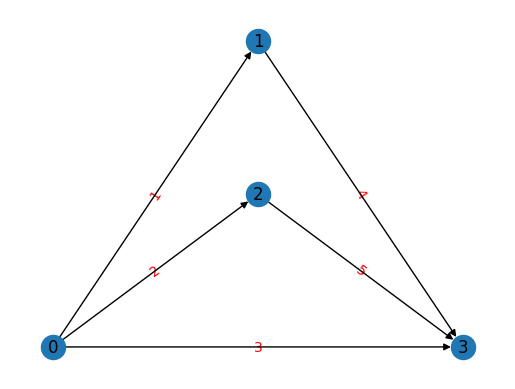

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()

G.add_edges_from([(0,1),(0,2),(0,3),(1,3),(2,3)])

pos = {0:[0,0], 1:[1,2], 2:[1,1], 3:[2,0]}

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'1',
(0,2):'2',(0,3):'3',(1,3):'4',
(2,3):'5'},font_color='red')

nx.draw(G, pos, with_labels=True)

#the red numbers are only labels, there are no capacities

We now use network flow optimization to find the shortest path from 0 to 3.

Since the problem is linear, the solution will be to allocate the flow on a convex combination of the optimal paths. The optimal paths can be thus deduced from the non-zero components of the optimal flow.

In [ ]:
!pip install cvxpy

In [18]:
import cvxpy as cp

# Problem data.

# Incidence matrix of the graph
B = np.array([[1,1,1,0,0],[-1,0,0,1,0],[0,-1,0,0,1],[0,0,-1,-1,-1]])
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and exits the destination node
# the solution of the shortest path problem is actually independent on the throughput value because of the linearity
tau = 1
nu = np.array([1, 0, 0, -1]) * tau

# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
l = np.array([6,2,6,3,3]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Optimal f:", f.value)

Optimal f: [1.09586411e-10 1.00000000e+00 7.99491029e-11 1.09586737e-10
 1.00000000e+00]


The following characterization may be used to individuate the shortest paths: if the flow on a path $p$ is positive (i.e., if the flow on all the edges that compose the path is positive), then $p$ is a shortest path.

In this case the optimal path is 0-2-3, since the two non-zero components of $f^*$ correspond to links 2 and 5.

This can be used for instance to compute the diameter of a network, the average distance between the nodes, and so on.

However, this is not the most efficient way to do this, and usually NetworkX has built-in functions that do this without using convex optimization.

# Traffic applications with congestion

## Pigou's example

Pigou was the first to illustrate the role of externality in users' choices, and the difference between user optimum and system optimum flow distributions.

We consider the traffic network with delay functions shown in figure below, which is assumed to
have a unit exogenous inflow at node $o$ and a unit exogenous outflow at node $d$.

![figure](pigou.png)


1.  Determine the social (system) optimum flow distribution using CVXPY. The social optimum flow distribution is defined as the one minimizing the total delay $\sum_{e\in \mathcal{E}} \psi_e(f_e)$, where on every link $e \in \mathcal{E}$, the cost is $\psi_e(f_e) = f_e d_e(f_e)$ with $d_e(f_e)$ being the delay function. (note that if $d_e(f_e)$ is constant, i.e., if there is no congestion, the problem reduces to finding the shortest path)
2. Determine the user optimum flow (Wardrop equilibrium) using CVXPY.
3. Find tolls to align user optimum to social optimum.

### Solution

1.  **Compute social optimum flows.** The social optimum of the network flow problem can be computed with CVXPY using the following code.

In [19]:
import numpy as np

# Problem data.

# compute node_edge incidence matrix
# +1 if the node is the source (tail) of an edge 
# and -1 if it is the destination (head) of the edge.
B = np.array([[1, 1],[-1,-1]])
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.array([1, -1])
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
# In this case, the objective function is
# f_1^2 + f_2
Q = np.diag([1,0]) # diagonal matrix
l = np.array([0,1]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.quad_form(f,Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print("Social optimal flow:", opt_flow)
print("Optimal cost:", cost_opt)

Social optimal flow: [0.5 0.5]
Optimal cost: 0.75


2.  **Compute Wardrop equilibrium.** 

**Definition**: The Wardrop equilibrium is a path flow distribution such that if a path $p$ is used, then the cost of the path is minimal, i.e.,

$$
z_p>0 \implies c_p(z) \le c_r(z), \quad \forall \ r \in \mathcal{P},
$$

where $\mathcal{P}$ is the path set, $f=Az$ is the projection of the path flow on the link set, and $c_p(z) = \sum_{e: e \in p} d_e(f_e)$, namely the cost of a path is the sum of the delays that compose the path.

We say that $f$ is a Wardrop equilibrium if it is induced by a Wardrop equilibrium $z$ via $f=Az$.

**Theorem**: $f^{(0)}$ is a Wardrop equilibrium if and only if it is solution of a network flow optimization given that the cost functions $\psi_e(f_e)$ are chosen as

$$
\psi_e(f_e) = \int_0^{f_e} d_e(s)~\mathrm{d}s.
$$
For our problem, the objective function is
$$
\frac{f_1^2}{2}+f_2
$$

In [20]:
B = np.array([[1, 1],[-1,-1]])
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.array([1, -1])
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
Q = np.diag([1/2,0]) # diagonal matrix
l = np.array([0,1]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
cp.quad_form(f,Q)
objective = cp.Minimize(cp.quad_form(f,Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result_w = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Wardrop equilibrium:", f.value)

Wardrop equilibrium: [ 1.00000000e+00 -6.25005061e-25]


Note that the social cost under Wardrop equilibrium is not the solution of the optimization problem above. It is

$$
\sum_{e}f_e^{(0)}d_e(f_e^{(0)}),
$$
where 

\begin{equation}
\begin{aligned}
	f^{(0)} \in \ & \underset{\substack{f \in \mathrm{R}^{E}_+ \\ B f = \nu}}{\arg\min}
	& & \sum_{e \in E} \int_{0}^{f_e} d_e (s) ds.
\end{aligned}
\end{equation}
is the Wardrop equilibrium of the game, namely the total travel time at the equilibrium. The Price of Anarchy is

$$
PoA = \frac{\sum_{e}f_e^{(0)}d_e(f_e^{(0)})}{\sum_{e}f_e^{*}d_e(f_e^{*})}
$$

This observation immediately implies that the price of anarchy cannot be less than 1.

In [21]:
def cost(f):
    return f[0]*f[0]+f[1] # compute the social cost (total travel time) (f_1)^2+f_2

cost_w = cost(f.value) # evaluate the social cost at the Wardrop equilibrium

print("Wardrop cost:", cost_w)

Wardrop cost: 1.0


We can compute the price of anarchy, which is the ratio between the Wardrop cost and the optimal cost.

In [22]:
PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)

The price of anarchy: 1.3333333333333333


**Theorem** [Roughgarden et al., 2006] The maximum price of anarchy achievable with affine delay functions is $4/3 \sim 1.33333...$.

Thus, this simple example achieves the maximum possible price of anarchy!

![figure](pigou.png)

In other words, what is the price of anarchy? 

- Assume that users' choices are imposed by a central planner. The flow distribution emerging from this centralized decision scheme is the social optimum flow distribution.
- In contrast with this, assume that users are free to choose their path based on other users' choices. The flow distribution emerging from this uncoordinated selfish behaviour is the Wardrop equilibrium, in which every user selects a path with minimal delay.

Note indeed that under system optimum flow distribution $(1/2, 1/2)$, the delay associated to each path (in this case, links) are

$$
d_1(1/2) = 1/2, \qquad d_2(1/2) = 1,
$$

thus an agent that is using the edge 2, if free to choose, will switch to edge 1.

There are two ways to improve the performance of the network:
- the first one is to improve the infrastructure (e.g., improving the delay functions of the links, or adding new links), which is called **network design problem**;
- the second way is to influence the agents' behaviour, in such a way to align user optimum flows with social optimum flows and reduce the inefficiency due to uncoordinated agent behaviour. This can be done in practice by information design, or adding tolls to the links of the network, which is the subject of the next part.

### How to add tolls: marginal tolls
The property of Wardrop equilibrium is that the cost of each used path (link, in this case) is the same.

However, when switching from edge 2 to edge 1 (same argument may be applied to paths in more complicated networks), an infinitesimal agent produces a modification in the social cost which is

$$
\psi_1'(f_1)-\psi_2'(f_2) = d_1(f_1)+f_1 d_1'(f_1) - d_2(f_2)-f_2 d_2'(f_2),
$$

where $f_e d_e'(f_e)$ is the derivative of the cost that the other users on edge $e$ will pay due to the addition of infinitesimal flow on edge $e$.

The idea of marginal tolls is that if a toll equal to $f_e^{*} d_e'(f_e^{*})$ is added to each link $e$ (where $f^{*}$ denotes the social optimum flow distribution), then selfish users should pay not only for their delay, but also for the cost that make other users pay due to their choice.

Thus, users minimize the cost that all the system pays for their choice, which leads to social optimum flows.

3. **Compute Wardrop equilibrium with tolls.** Computing the Wardrop equilibrium as in 2., but with the link delays $d_e(f_e)$ replaced by $d^{(\omega_e)}_e(f_e) = d_e(f_e) + \omega_e$, a CVXPY solution can be obtained by the following code:

In [23]:
B = np.array([[1, 1],[-1,-1]])
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.array([1, -1])

# find marginal tolls: for each edge the toll equals f*_e d_e'(f_e*)
# for affine delays l_e + b_e f_e, this reads b_e f*_e
# in this example b = [1,0]
omega = opt_flow * np.array([1,0])

# the objective function is the same as before, except for the tolls
l = l + omega

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.quad_form(f, Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Wardrop equilibrium with tolls:", f.value)

Wardrop equilibrium with tolls: [0.5 0.5]


The resulting flow vector is $f^{(\omega)} = (1/2, 1/2)'$, which is also the social optimum flow, as expected.

## Braess' paradox

Braess' paradox occurs when improving the network, e.g., adding a link, leads to a higher social cost under Wardrop equilibrium, or equivalently, removing a link reduces the social cost under Wardrop equilibrium .

Let us see an example.

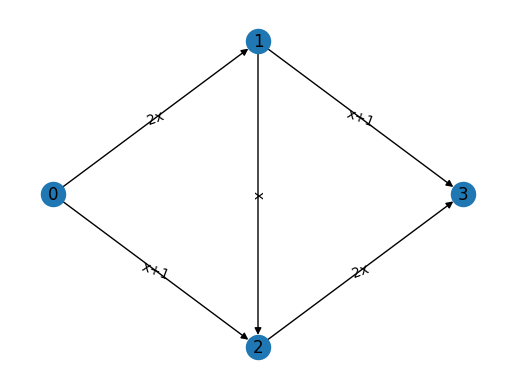

In [34]:
G = nx.DiGraph()

G.add_nodes_from([0,1,2,3])

G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,3)])

pos = {0:[0,0], 1:[2,1], 2:[2,-1], 3:[4,0]}

labels = ['2x','x+1','x','x+1','2x']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels=True)

Edge labels represent delay functions

**Social optimum flows**

In [35]:
B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()
n_edges = len(G.edges)
# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
# the solution of the shortest path problem is actually independent on the throughput value because of the linearity
tau = 1
nu = np.array([1, 0, 0, -1]) * tau
# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
# In this case, the objective function is

Q = np.diag([2,1,1,1,2]) # diagonal matrix
l = np.array([0,1,0,1,0]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.quad_form(f,Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Optimal flows:", f.value)
print("Optimal cost:", cost_opt)

Optimal flows: [5.00000000e-01 5.00000000e-01 2.93299946e-17 5.00000000e-01
 5.00000000e-01]
Optimal cost: 2.5000000000000004


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_14888\832722189.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()


**Wardrop equilibrium**


In [36]:
B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()
n_edges = len(G.edges)
# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
tau = 1
nu = np.array([1, 0, 0, -1]) * tau
# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
# In this case, the objective function is

Q = np.diag([1,1/2,1/2,1/2,1]) # diagonal matrix
l = np.array([0,1,0,1,0]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.quad_form(f,Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
print(result)
# The optimal value for f is stored in `f.value`.
print("Wardrop flows:", f.value)

1.7000000000000002
Wardrop flows: [0.6 0.4 0.2 0.4 0.6]


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_14888\1703887247.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()


In [37]:
# cost, defined as \sum_e f_e d_e(f_e)
def cost(f):
    return 2*f[0]*f[0]+f[1]*(f[1]+1)+f[2]*f[2]+f[3]*(f[3]+1)+2*f[4]*f[4]

cost_w = cost(f.value) 

print("Wardrop cost:", cost_w)

PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)

Wardrop cost: 2.6000000000000005
The price of anarchy: 1.04


Note that under optimal flows the link $e_3$ is not used, while under Wardrop equilibrium $e_3$ is used, and PoA>1.

This suggests that the inefficiency (since PoA>1) may be eliminated by removing the link $e_3$

Let's try!

The optimal flows are not affected by the removal $e_3$ (why?). Let's compute the Wardrop equilibrium of the new network. 

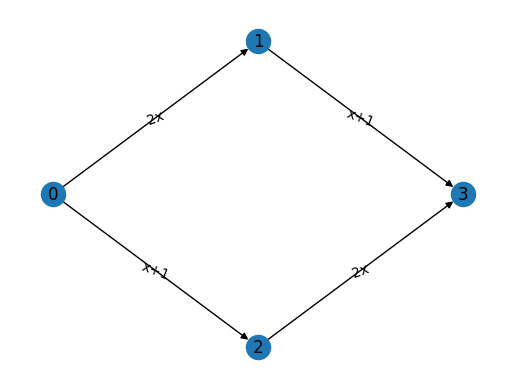

In [38]:
# G without $e_3$

G = nx.DiGraph()

G.add_nodes_from([0,1,2,3])

G.add_edges_from([(0,1),(0,2),(1,3),(2,3)])

pos = {0:[0,0], 1:[2,1], 2:[2,-1], 3:[4,0]}

labels = ['2x','x+1','x+1','2x']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels=True)

In [39]:
B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()
n_edges = len(G.edges)

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
tau = 1
nu = np.array([1, 0, 0, -1]) * tau
# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
# In this case, the objective function is

Q = np.diag([1,1/2,1/2,1]) # diagonal matrix
l = np.array([0,1,1,0]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(cp.quad_form(f,Q) + l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Wardrop flows:", f.value)

Wardrop flows: [0.5 0.5 0.5 0.5]


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_14888\437441868.py:1: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray()


In [40]:
# cost, defined as \sum_e f_e d_e(f_e)
def cost(f):
    return 2*f[0]*f[0]+f[1]*(f[1]+1)+f[2]*(f[2]+1)+2*f[3]*f[3]

cost_w = cost(f.value) 

print("Wardrop cost:", cost_w)

PoA = cost_w/cost_opt

print("The price of anarchy:", PoA)

Wardrop cost: 2.5
The price of anarchy: 0.9999999999999998


The Wardrop cost decreases, so Braess' paradox occurs.

This is an example of network design problem in which links are removed instead of added or improved, exploiting Braess' paradox. Braess' paradox has been observed also in reality, not only in theoretical examples.

The price of anarchy could be minimized also by adding marginal tolls, or by other toll patterns, e.g., by adding a large toll on link $e_3$ in such a way to prevent users to travel along that link.

### A sufficient conditions for PoA=1

**Observation**: assume that delay functions are linear, i.e., $d_e(f_e) = a_e f_e$. Then, 

$$
f_e d_e(f_e) = a_e f_e^2 = 2 \int_{0}^{f_e} d_e(s) ds,
$$

which implies that if the delay functions are linear, then user equilibria coincide with social optimum flows.

### Resistor networks
Network flow optimization can be adapted to many applications, for instance electrical flows in resistor networks.

In particular, social optimum traffic flows coincide with electrical current in a resistor network if:
- the delay functions are linear, i.e., $d_e(f_e) = a_e f_e$;
- the non-negativity constraint $f_e \ge 0$ is relaxed.

The coefficients $a_e$ have to be interpreted as the resistance of the link $e$, and the throughput $\tau$ as the electrical current injected in the network. It can also be proven that the Lagrangian multipliers associated to the mass conservation in the node set corresponds to electrical potential on the nodes of the resistor network. 

## Ford–Fulkerson Algorithm 
**Inputs**: a graph $G=(V,E)$, a vector of flow capacities $c = (c(u,v))_{(u,v) \in E}$, a source node $s$, and a sink node $t$

**Output**: a flow $f = (f(u,v))_{(u,v) \in E}$ from $s$ to $t$ of maximum throughput

1. $f(u,v)\leftarrow 0$ for all edges $(u,v)$
2. While there is a path $p$ from $s$ to $t$ in $G_{f}$, such that $c_{f}(u,v)=c(u,v)-f(u,v)>0$ for all edges $(u,v)\in p$:
 1. Find $c_{f}(p)=\min\{c_{f}(u,v):(u,v)\in p\}$
 2. For each edge $(u,v)\in p:$
      1. $f(u,v)\leftarrow f(u,v)+c_{f}(p)$ (Increase the flow along the path)
      2. $f(v,u)\leftarrow f(v,u)-c_{f}(p)$ (Impose the symmetry of the flow)

Ford-Fulkerson Algorithm is called a "method", instead of "algorithm", because it does not specify univocally how to select paths.

### Edmonds-Karp Algorithm
The Edmonds–Karp algorithm is an implementation of Ford–Fulkerson method, where the search order to find augmenting paths is defined. A shortest path that has available capacity is found by a breadth-first search.

In [ ]:
import collections

# This class represents a directed graph using adjacency matrix representation
class Graph:
    # __init__ is a reseved method in python classes.
    # In object oriented terminology, it is the constructor of the class.
    # We define a new class 'graph' instead of using the NetworkX package.
    def __init__(self, graph): 
        # the Graph object represents the flow network and the graph
        # attribute will be updated by the Edmonds-Karp Algorithm to 
        # represent the residual graph.
        # Entry [u][v] of graph array stores the capacity of link (u,v).
        self.graph = graph  
        # Number of nodes:
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        """Returns true if there is a path from source 's' to sink 't' in the
        residual graph. Also fills parent[] to store the path """
        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a double-ended queue for BFS
        queue = collections.deque()

        # Mark the source node as visited and enqueue it
        # When visited, nodes are appended "to the right end" of the queue.
        queue.append(s)
        visited[s] = True

        # Standard BFS loop
        while queue: # while there are still elements in the queue
            # Nodes are extracted from "the left end" of the queue
            u = queue.popleft()

            # Get all adjacent vertices of the dequeued vertex u
            # If an adjacent vertex has not been visited, then mark 
            # it as visited and enqueue it.
            
            # Enumerate() method adds a counter to an iterable
            # to keep a count of iterations. We cycle over row
            # u of graph array: ind is the index of the node,
            # val is >0 if node ind is adjacent to u, i.e. if 
            # there is residual capacity on the link (u,ind),
            # it is 0 otherwise.
            for ind, val in enumerate(self.graph[u]): 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        # If sink is reached by BFS starting from source, then return
        # true, else return false
        return visited[t]

    # Returns the maximum flow from s to t in the given graph
    def edmonds_karp(self, source, sink):
        # parent array is filled by bfs() and it is used 
        # to compute augmenting paths.
        # It is initialized with the sentinel value -1
        parent = [-1] * (self.ROW)

        # Both max flow value and max flow vector are 
        # initialized to 0
        max_flow = 0  
        # initialize matrix of zeros with size ROW x ROW
        flow = np.array([[0] * (self.ROW)] * (self.ROW))

        # Augment the flow while there is a path from source to sink
        # in the residual graph
        while self.bfs(source, sink, parent): # the algorithm stops when there are augmenting paths from s to t
            # now parent stores the augmenting path found by bfs

            # Find the minimum residual capacity of the edges along the
            # origin-destination path found by BFS.
            res_capacity = float("Inf")
            # start from the endpoint of the path
            n = sink
            # travel the path backwards until you reach the source
            # and update the minimal residual capacity of links
            while n != source:
                res_capacity = min(res_capacity, self.graph[parent[n]][n])
                n = parent[n] 

            # Add the residual capacity to the maximal throughput
            max_flow += res_capacity

            # Update the flow vector by adding the residual capacity
            # of the augmenting path to each edge in the path (to preserve
            # symmetry, subtract it to each reverse edge).
            # Compute the new residual network by updating
            # the residual capacities of the edges and reverse edges
            # along the augmenting path.
            v = sink
            while v != source:
                u = parent[v]
                flow[u][v] += res_capacity
                flow[v][u] -= res_capacity
                self.graph[u][v] -= res_capacity
                self.graph[v][u] += res_capacity
                v = parent[v]  
            
        return max_flow, flow

In [ ]:
W = np.array([[0,1000,1000,0],[0,0,1,1000],[0,0,0,1000],[0,0,0,0]])
G = Graph(W)

max_flow, flow = Graph.edmonds_karp(G,0,3)

print("The maximum flow:", max_flow, "\n")
print("The flow distribution: \n", flow)

Let us explore the steps of the algorithm by adding some print in the code.

In [ ]:
class Graph_print:
    # __init__ is a reseved method in python classes.
    # In object oriented terminology, it is the constructor of the class.
    # We define a new class 'graph' instead of using the NetworkX package.
    def __init__(self, graph): 
        # the Graph object represents the flow network and the graph
        # attribute will be updated by the Edmonds-Karp Algorithm to 
        # represent the residual graph.
        # Entry [u][v] of graph array stores the capacity of link (u,v).
        self.graph = graph  
        # Number of nodes:
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        """Returns true if there is a path from source 's' to sink 't' in the
        residual graph. Also fills parent[] to store the path """
        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a double-ended queue for BFS
        queue = collections.deque()

        # Mark the source node as visited and enqueue it
        # When visited, nodes are appended "to the right end" of the queue.
        queue.append(s)
        visited[s] = True

        # Standard BFS loop
        while queue: # while there are still elements in the queue
            # Nodes are extracted from "the left end" of the queue
            print("Queue:", queue, "\n")
            u = queue.popleft()
            print("Extracted node:", u, "\n")

            # Get all adjacent vertices of the dequeued vertex u
            # If an adjacent vertex has not been visited, then mark 
            # it as visited and enqueue it.
            
            # Enumerate() method adds a counter to an iterable
            # to keep a count of iterations. We cycle over row
            # u of graph array: ind is the index of the node,
            # val is >0 if node ind is adjacent to u, i.e. if 
            # there is residual capacity on the link (u,ind),
            # it is 0 otherwise.
            for ind, val in enumerate(self.graph[u]): 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
            
            print("Parents", parent, "\n")
            print("Visited", visited, "\n \n \n")

        # If sink is reached by BFS starting from source, then return
        # true, else return false
        return visited[t]

    # Returns the maximum flow from s to t in the given graph
    def edmonds_karp(self, source, sink):
        n_iter = 1
        print("iteration of bfs number:", n_iter, "\n")
        # parent array is filled by bfs() and it is used 
        # to compute augmenting paths.
        # It is initialized with the sentinel value -1
        # If parent[j] == -1, node 'j' has not been visited yet
        parent = [-1] * (self.ROW)

        # Both max flow value and max flow vector are 
        # initialized to 0
        max_flow = 0  
        # initialize matrix of zeros with size ROW x ROW
        flow = np.array([[0] * (self.ROW)] * (self.ROW))

        # Augment the flow while there is a path from source to sink
        # in the residual graph
        while self.bfs(source, sink, parent): # the algorithm stops when there are augmenting paths from s to t
            # now parent stores the augmenting path found by bfs

            # Find the minimum residual capacity of the edges along the
            # origin-destination path found by BFS.
            res_capacity = float("Inf")
            # start from the endpoint of the path
            n = sink
            # travel the path backwards until you reach the source
            # and update the minimal residual capacity of links
            while n != source:
                res_capacity = min(res_capacity, self.graph[parent[n]][n])
                n = parent[n] 

            # Add the residual capacity to the maximal throughput
            max_flow += res_capacity

            # Update the flow vector by adding the residual capacity
            # of the augmenting path to each edge in the path (to preserve
            # symmetry, subtract it to each reverse edge).
            # Compute the new residual network by updating
            # the residual capacities of the edges and reverse edges
            # along the augmenting path.
            v = sink
            while v != source:
                u = parent[v]
                flow[u][v] += res_capacity
                flow[v][u] -= res_capacity
                self.graph[u][v] -= res_capacity
                self.graph[v][u] += res_capacity
                v = parent[v]  
            n_iter += 1
            print("iteration of bfs number:", n_iter, "\n")
            
        return max_flow, flow

In [ ]:
W = np.array([[0,1000,1000,0],[0,0,1,1000],[0,0,0,1000],[0,0,0,0]])
G = Graph_print(W)

max_flow, flow = Graph_print.edmonds_karp(G,0,3)

Networkx implements the Edmonds-Karp algorithm. 

The `networkx.algorithms.flow.edmonds_karp` function returns the residual network resulting after computing the maximum flow.

Networkx also provides the functions `networkx.algorithms.flow.maximum_flow` and `networkx.algorithms.flow.minimum_cut` which compute the maximun throughput and  the value and the node partition of a minimum cut, respectively.